In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf


config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ncr = NeighbourhoodCleaningRule()

In [4]:
res.resample_directory(ncr, path, 'NeighborhoodCleaningRule', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/NeighborhoodCleaningRule/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/NeighborhoodCleaningRule/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 4809 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s = 49)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=50)

Epoch 1/50
163/163 [==============================] - 20s 121ms/step - loss: 0.4286 - tp: 4332.0000 - fp: 1268.0000 - tn: 3925.0000 - fn: 861.0000 - accuracy: 0.7950 - precision: 0.7736 - recall: 0.8342 - auc: 0.8845 - val_loss: 0.6412 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8340
Epoch 2/50
163/163 [==============================] - 15s 93ms/step - loss: 0.2122 - tp: 4761.0000 - fp: 431.0000 - tn: 4762.0000 - fn: 432.0000 - accuracy: 0.9169 - precision: 0.9170 - recall: 0.9168 - auc: 0.9722 - val_loss: 0.3386 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9277
Epoch 3/50
163/163 [==============================] - 16s 98ms/step - loss: 0.1902 - tp: 4784.0000 - fp: 404.0000 - tn: 4789.0000 - fn: 409.0000 - accuracy: 0.9217 - precision: 0.9221 - recall: 0.9212 - auc: 0.

163/163 [==============================] - 16s 96ms/step - loss: 0.0864 - tp: 5002.0000 - fp: 169.0000 - tn: 5001.0000 - fn: 168.0000 - accuracy: 0.9674 - precision: 0.9673 - recall: 0.9675 - auc: 0.9950 - val_loss: 0.6695 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8398
Epoch 22/50
163/163 [==============================] - 16s 98ms/step - loss: 0.0919 - tp: 5034.0000 - fp: 173.0000 - tn: 5043.0000 - fn: 182.0000 - accuracy: 0.9660 - precision: 0.9668 - recall: 0.9651 - auc: 0.9942 - val_loss: 0.1946 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9883
Epoch 23/50
163/163 [==============================] - 15s 95ms/step - loss: 0.0951 - tp: 4981.0000 - fp: 187.0000 - tn: 4983.0000 - fn: 189.0000 - accuracy: 0.9636 - precision: 0.9638 - recall: 0.9634 - auc: 0.9941 - val_

163/163 [==============================] - 9s 58ms/step - loss: 0.0659 - tp: 5045.0000 - fp: 124.0000 - tn: 5046.0000 - fn: 125.0000 - accuracy: 0.9759 - precision: 0.9760 - recall: 0.9758 - auc: 0.9970 - val_loss: 0.1632 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9941
Epoch 42/50
163/163 [==============================] - 10s 59ms/step - loss: 0.0616 - tp: 5088.0000 - fp: 127.0000 - tn: 5089.0000 - fn: 128.0000 - accuracy: 0.9756 - precision: 0.9756 - recall: 0.9755 - auc: 0.9974 - val_loss: 0.1789 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9844
Epoch 43/50
163/163 [==============================] - 10s 60ms/step - loss: 0.0666 - tp: 5056.0000 - fp: 136.0000 - tn: 5057.0000 - fn: 137.0000 - accuracy: 0.9737 - precision: 0.9738 - recall: 0.9736 - auc: 0.9970 - val_l

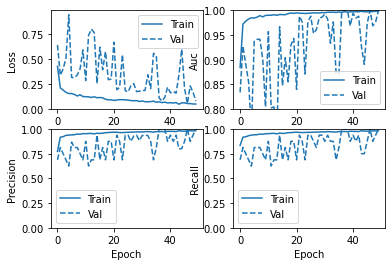

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.94      0.85      0.89       234
   PNEUMONIA       0.92      0.97      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.91      0.92       624
weighted avg       0.93      0.92      0.92       624



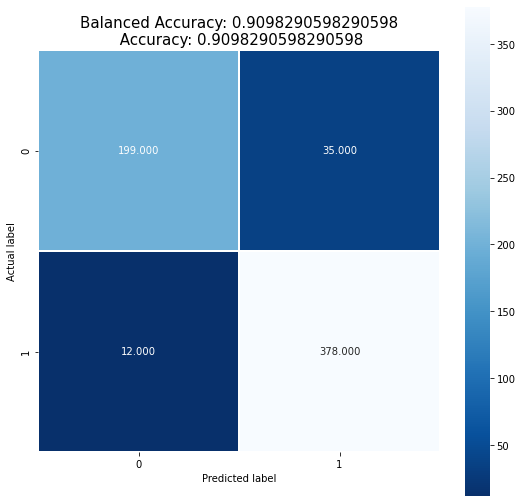

In [13]:
cnn.display_confusion_matrix(test_set)